Task 2

In [1]:
import requests
download_url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/nba-elo/nbaallelo.csv"
target_csv_path = "nba_all_elo.csv"
response = requests.get(download_url)
response.raise_for_status()
with open(target_csv_path, "wb") as f:
    f.write(response.content)
print("download ready")

download ready


Task 3

In [2]:
%%writefile lab2_NBA.py 
#importing Pandas in Python with the pd alias
import pandas as pd

#read in the dataset and store it as a DataFrame object in the variable nba
#When you copy the file path, if you get the FileNotFoundError: [Errno 2]
#then just flip the backslash to a forward slash and voila it works!
nba = pd.read_csv("nba_all_elo.csv")

#check nba's type, it should be a DataFrame
type(nba)

Overwriting lab2_NBA.py


In [25]:
import pandas as pd

nba = pd.read_csv("nba_all_elo.csv")

In [26]:
len(nba)
nba.shape
nba.head(3)
pd.set_option("display.max.columns", None)
pd.set_option("display.max.columns", 2)
nba.tail
pd.set_option("display.max.columns", None)

In [27]:
#Question 1
pd.set_option("display.max.columns", None)
nba.head(n=3)

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,66,1300.0,1293.2767,40.294830,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.640065,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,68,1300.0,1306.7233,41.705170,TRH,Huskies,66,1300.0000,1293.2767,A,W,0.359935,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,63,1300.0,1309.6521,42.012257,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.631101,NaN


In [33]:
#nba.info()
nba2= nba.describe()
# frames = [nba1, nba]
# result = pd.concat(frames)
# result
nba2

,gameorder,_iscopy,year_id,seasongame,is_playoffs,pts,elo_i,elo_n,win_equiv,opp_pts,opp_elo_i,opp_elo_n,forecast
count,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000
mean,31579.000000,0.500000,1988.200374,43.533733,0.063857,102.729982,1495.236055,1495.236055,41.707889,102.729982,1495.236055,1495.236055,0.500000
std,18231.927643,0.500002,17.582309,25.375178,0.244499,14.814845,112.139945,112.461687,10.627332,14.814845,112.139945,112.461687,0.215252
min,1.000000,0.000000,1947.000000,1.000000,0.000000,0.000000,1091.644500,1085.774400,10.152501,0.000000,1091.644500,1085.774400,0.020447
25%,15790.000000,0.000000,1975.000000,22.000000,0.000000,93.000000,1417.237975,1416.994900,34.103035,93.000000,1417.237975,1416.994900,0.327989
50%,31579.000000,0.500000,1990.000000,43.000000,0.000000,103.000000,1500.945550,1500.954400,42.113357,103.000000,1500.945550,1500.954400,0.500000
75%,47368.000000,1.000000,2003.000000,65.000000,0.000000,112.000000,1576.060000,1576.291625,49.635328,112.000000,1576.060000,1576.291625,0.672011
max,63157.000000,1.000000,2015.000000,108.000000,1.000000,186.000000,1853.104500,1853.104500,71.112038,186.000000,1853.104500,1853.104500,0.979553


In [9]:
import numpy as np
nba.describe(include=np.object)

,game_id,lg_id,date_game,team_id,fran_id,opp_id,opp_fran,game_location,game_result,notes
count,126314,126314,126314,126314,126314,126314,126314,126314,126314,5424
unique,63157,2,12426,104,53,104,53,3,2,231
top,199711090LAL,NBA,1/2/2009,BOS,Lakers,BOS,Lakers,H,W,at New York NY
freq,2,118016,30,5997,6024,5997,6024,63138,63157,440


Question 2 - 

team_id and fran_id have same number of observations, but less number of unique franchises games. So there it means many franchises have more than 1 teams playing games. Also the highest number of games teams played is BOS(5997 observ) while highest franchise Lakers (6024 observations). This means Lakers franchise have highest number team games observations as well, which will include more than data of 1 team because highest games observ of teams BOS is smaller (5997) than lakers observation.

In [10]:
nba["team_id"].value_counts()

BOS    5997
NYK    5769
LAL    5078
DET    4985
PHI    4533
       ... 
INJ      60
PIT      60
DTF      60
TRH      60
SDS      11
Name: team_id, Length: 104, dtype: int64

In [11]:
nba["fran_id"].value_counts()

Lakers          6024
Celtics         5997
Knicks          5769
Warriors        5657
Pistons         5650
Sixers          5644
Hawks           5572
Kings           5475
Wizards         4582
Spurs           4309
Bulls           4307
Pacers          4227
Thunder         4178
Rockets         4154
Nuggets         4120
Nets            4106
Suns            4080
Bucks           4034
Trailblazers    3870
Cavaliers       3810
Clippers        3733
Jazz            3555
Mavericks       3013
Heat            2371
Pelicans        2254
Magic           2207
Timberwolves    2131
Grizzlies       1657
Raptors         1634
Hornets          894
Colonels         846
Squires          799
Spirits          777
Stars            756
Sounds           697
Baltimore        467
Floridians       440
Condors          430
Capitols         291
Olympians        282
Sails            274
Stags            260
Bombers          249
Steamrollers     168
Packers           72
Redskins          65
Rebels            63
Waterloo     

In [12]:
nba.loc[nba["fran_id"] == "Lakers", "team_id"].value_counts()

LAL    5078
MNL     946
Name: team_id, dtype: int64

In [13]:
nba.loc[nba["team_id"] == "MNL", "date_game"].min()

'1/1/1949'

In [14]:
nba.loc[nba["team_id"] == "MNL", "date_game"].max()

'4/9/1959'

In [15]:
nba.loc[nba["team_id"] == "MNL", "date_game"].agg(("min", "max"))

min    1/1/1949
max    4/9/1959
Name: date_game, dtype: object

In [16]:
#Question 3_a
nba.loc[nba["team_id"] == "MNL", "game_result"].value_counts()

W    524
L    422
Name: game_result, dtype: int64

In [17]:
#Question 3_b
nba.loc[nba["team_id"] == "MNL", "pts"] # Individual game points
nba.loc[nba["team_id"] == "MNL", "pts"].sum()# Sum of all points scored

88229

In [18]:
nba.loc[nba["team_id"] == "LAL", "pts"].sum()

549215

In [19]:
nba.loc[nba["fran_id"] == "Lakers", "pts"].sum()

637444

In [20]:
#Question 4 - Total points of BOS
nba.loc[nba["team_id"] == "BOS", "pts"].sum()

626484

Question 5

LAL and MNL are two teams in franchise LAKERS, which had played total 6024 games(5078 and 946 respectively). BOS team played 5997 games which is highest in teams but LAKERS frenchise consistes of LAL and MNL whose sum is greater than BOS team. Furthermore, LAKERS franchise with 2 teams in total scored 637444 points, while BOS team scored 626484 points.

In [22]:
nba.head(5)

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,66,1300.0000,1293.2767,40.294830,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.640065,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,68,1300.0000,1306.7233,41.705170,TRH,Huskies,66,1300.0000,1293.2767,A,W,0.359935,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,63,1300.0000,1309.6521,42.012257,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.631101,NaN
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,47,1306.7233,1297.0712,40.692783,CHS,Stags,63,1300.0000,1309.6521,A,L,0.368899,NaN
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,33,1300.0000,1279.6189,38.864048,WSC,Capitols,50,1300.0000,1320.3811,H,L,0.640065,NaN


In [23]:
#Question 6
#6.1) Use a data access method to display the 4th row from the bottom of the nba
#dataset
nba.iloc[-4:-3,]


,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,66,1300.0000,1293.2767,40.294830,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.640065,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,68,1300.0000,1306.7233,41.705170,TRH,Huskies,66,1300.0000,1293.2767,A,W,0.359935,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,63,1300.0000,1309.6521,42.012257,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.631101,NaN
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,47,1306.7233,1297.0712,40.692783,CHS,Stags,63,1300.0000,1309.6521,A,L,0.368899,NaN
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,33,1300.0000,1279.6189,38.864048,WSC,Capitols,50,1300.0000,1320.3811,H,L,0.640065,NaN
5,3,194611020DTF,NBA,1,1947,11/2/1946,1,0,WSC,Capitols,50,1300.0000,1320.3811,43.135952,DTF,Falcons,33,1300.0000,1279.6189,A,W,0.359935,NaN
6,4,194611020PRO,NBA,1,1947,11/2/1946,1,0,BOS,Celtics,53,1300.0000,1294.8458,40.459381,PRO,Steamrollers,59,1300.0000,1305.1542,A,L,0.359935,NaN
7,4,194611020PRO,NBA,0,1947,11/2/1946,1,0,PRO,Steamrollers,59,1300.0000,1305.1542,41.540619,BOS,Celtics,53,1300.0000,1294.8458,H,W,0.640065,NaN
8,5,194611020STB,NBA,1,1947,11/2/1946,1,0,PIT,Ironmen,51,1300.0000,1295.3092,40.507980,STB,Bombers,56,1300.0000,1304.6908,A,L,0.359935,NaN
9,5,194611020STB,NBA,0,1947,11/2/1946,1,0,STB,Bombers,56,1300.0000,1304.6908,41.492020,PIT,Ironmen,51,1300.0000,1295.3092,H,W,0.640065,NaN


In [20]:
#6.2) Use a data access method to display the 2nd row from the top of the nba dataset
nba.iloc[2:3,]


,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,63,1300.0,1309.6521,42.012257,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.631101,NaN


In [21]:
#6.3) Access all games between the labels 5555 and 5559, you only want to see the names of teams and the scores.
#Solution -  From nba.head() , we know we need team_id and pts for columns 
nba.iloc[5555:5560,[8,10]]

,team_id,pts
5555,FTW,83
5556,BOS,95
5557,NYK,74
5558,ROC,81
5559,SYR,86


In [24]:
nba.shape
current_decade = nba[nba["year_id"] > 2010]
current_decade.shape


(126314, 23)

In [52]:
#Q7 - Create a new DataFrame which consists of the games played between 2000 and 2009
prev_decade= nba[nba['year_id'].between(2000,2009)]
prev_decade.shape


(25810, 23)

In [54]:
games_with_notes = nba[nba["notes"].notnull()]
games_with_notes.shape
ers = nba[nba["fran_id"].str.endswith("ers")]
ers.shape
nba[(nba["_iscopy"] == 0) & (nba["pts"] > 100) & (nba["opp_pts"] > 100) & (nba["team_id"] == "BLB")]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
1726,864,194902260BLB,NBA,0,1949,2/26/1949,53,0,BLB,Baltimore,114,1421.9351,1419.4280,38.557545,MNL,Lakers,115,1637.9852,1640.4923,H,L,0.338936,NaN
4890,2446,195301100BLB,NBA,0,1953,1/10/1953,32,0,BLB,Baltimore,126,1328.6687,1356.6470,25.797792,BOS,Celtics,105,1591.1434,1563.1652,H,W,0.281855,NaN
4909,2455,195301140BLB,NBA,0,1953,1/14/1953,34,0,BLB,Baltimore,104,1349.8323,1346.3594,24.876236,MNL,Lakers,112,1665.4396,1668.9125,H,L,0.224238,NaN
5208,2605,195303110BLB,NBA,0,1953,3/11/1953,66,0,BLB,Baltimore,107,1284.5239,1282.2396,19.579676,NYK,Knicks,113,1649.1516,1651.4359,H,L,0.178973,at Boston MA
5825,2913,195402220BLB,NBA,0,1954,2/22/1954,60,0,BLB,Baltimore,110,1303.7493,1301.9685,20.736986,BOS,Celtics,111,1591.4943,1593.2749,H,L,0.253365,at Worcester MA


In [58]:
#Question 8 - 344 games
fil=nba[(nba["_iscopy"] == 0) & (nba["pts"] > 100) & (nba["opp_pts"] > 100) & (nba["year_id"] == 2011)]
fil.shape

(344, 23)

In [61]:
nba.groupby("fran_id", sort=False)["pts"].sum()
nba[(nba["fran_id"] == "Spurs") & (nba["year_id"] > 2010)].groupby(["year_id", "game_result"])["game_id"].count()

year_id  game_result
2011     L              25
         W              63
2012     L              20
         W              60
2013     L              30
         W              73
2014     L              27
         W              78
2015     L              31
         W              58
Name: game_id, dtype: int64

In [64]:
#Question 9 - Take a look at the New York Knicks 2011-12
#season (year_id: 2012). How many wins and losses did they score during the
#regular season and the playoffs?

nba[(nba["fran_id"] == "Knicks") & (nba["year_id"] == 2012)].groupby(["year_id", "game_result"])["game_id"].count()

year_id  game_result
2012     L              34
         W              37
Name: game_id, dtype: int64

In [77]:
df = nba.copy()
df.shape
df["difference"] = df.pts - df.opp_pts
df.shape
df["difference"].max()
renamed_df = df.rename(columns={"game_result": "result", "game_location": "location"})
renamed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 24 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   gameorder    126314 non-null  int64  
 1   game_id      126314 non-null  object 
 2   lg_id        126314 non-null  object 
 3   _iscopy      126314 non-null  int64  
 4   year_id      126314 non-null  int64  
 5   date_game    126314 non-null  object 
 6   seasongame   126314 non-null  int64  
 7   is_playoffs  126314 non-null  int64  
 8   team_id      126314 non-null  object 
 9   fran_id      126314 non-null  object 
 10  pts          126314 non-null  int64  
 11  elo_i        126314 non-null  float64
 12  elo_n        126314 non-null  float64
 13  win_equiv    126314 non-null  float64
 14  opp_id       126314 non-null  object 
 15  opp_fran     126314 non-null  object 
 16  opp_pts      126314 non-null  int64  
 17  opp_elo_i    126314 non-null  float64
 18  opp_elo_n    126314 non-

In [88]:
df.shape
elo_columns = ["elo_i", "elo_n", "opp_elo_i", "opp_elo_n"]
#df.drop(elo_columns,inplace=True,axis=1)
df.shape

(126314, 20)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   gameorder      126314 non-null  int64         
 1   game_id        126314 non-null  object        
 2   lg_id          126314 non-null  object        
 3   _iscopy        126314 non-null  int64         
 4   year_id        126314 non-null  int64         
 5   date_game      126314 non-null  datetime64[ns]
 6   seasongame     126314 non-null  int64         
 7   is_playoffs    126314 non-null  int64         
 8   team_id        126314 non-null  object        
 9   fran_id        126314 non-null  object        
 10  pts            126314 non-null  int64         
 11  win_equiv      126314 non-null  float64       
 12  opp_id         126314 non-null  object        
 13  opp_fran       126314 non-null  object        
 14  opp_pts        126314 non-null  int64         
 15  

In [90]:
df["date_game"] = pd.to_datetime(df["date_game"])

In [92]:
df["game_location"].nunique()

3

In [94]:
df["game_location"].value_counts()
df["game_location"] = pd.Categorical(df["game_location"])

In [95]:
df["game_location"].dtype

CategoricalDtype(categories=['A', 'H', 'N'], ordered=False)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   gameorder      126314 non-null  int64         
 1   game_id        126314 non-null  object        
 2   lg_id          126314 non-null  object        
 3   _iscopy        126314 non-null  int64         
 4   year_id        126314 non-null  int64         
 5   date_game      126314 non-null  datetime64[ns]
 6   seasongame     126314 non-null  int64         
 7   is_playoffs    126314 non-null  int64         
 8   team_id        126314 non-null  object        
 9   fran_id        126314 non-null  object        
 10  pts            126314 non-null  int64         
 11  win_equiv      126314 non-null  float64       
 12  opp_id         126314 non-null  object        
 13  opp_fran       126314 non-null  object        
 14  opp_pts        126314 non-null  int64         
 15  

In [98]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   gameorder      126314 non-null  int64  
 1   game_id        126314 non-null  object 
 2   lg_id          126314 non-null  object 
 3   _iscopy        126314 non-null  int64  
 4   year_id        126314 non-null  int64  
 5   date_game      126314 non-null  object 
 6   seasongame     126314 non-null  int64  
 7   is_playoffs    126314 non-null  int64  
 8   team_id        126314 non-null  object 
 9   fran_id        126314 non-null  object 
 10  pts            126314 non-null  int64  
 11  elo_i          126314 non-null  float64
 12  elo_n          126314 non-null  float64
 13  win_equiv      126314 non-null  float64
 14  opp_id         126314 non-null  object 
 15  opp_fran       126314 non-null  object 
 16  opp_pts        126314 non-null  int64  
 17  opp_elo_i      126314 non-nul

In [103]:
#Question.10 (report your answer): Find another column in the nba dataset that
#has a generic data type and convert it to a more specific one. 

#Answer - I found is playoff (int) or not and converting to categorical

nba["is_playoffs"].nunique()

nba["is_playoffs"] = pd.Categorical(df["is_playoffs"])
nba["is_playoffs"].dtype
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   gameorder      126314 non-null  int64   
 1   game_id        126314 non-null  object  
 2   lg_id          126314 non-null  object  
 3   _iscopy        126314 non-null  int64   
 4   year_id        126314 non-null  int64   
 5   date_game      126314 non-null  object  
 6   seasongame     126314 non-null  int64   
 7   is_playoffs    126314 non-null  category
 8   team_id        126314 non-null  object  
 9   fran_id        126314 non-null  object  
 10  pts            126314 non-null  int64   
 11  elo_i          126314 non-null  float64 
 12  elo_n          126314 non-null  float64 
 13  win_equiv      126314 non-null  float64 
 14  opp_id         126314 non-null  object  
 15  opp_fran       126314 non-null  object  
 16  opp_pts        126314 non-null  int64   
 17  opp_elo_i 

In [105]:
rows_without_missing_data = nba.dropna()
rows_without_missing_data.shape

(5424, 23)

In [106]:
nba.describe()

,gameorder,_iscopy,year_id,seasongame,pts,elo_i,elo_n,win_equiv,opp_pts,opp_elo_i,opp_elo_n,forecast
count,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000
mean,31579.000000,0.500000,1988.200374,43.533733,102.729982,1495.236055,1495.236055,41.707889,102.729982,1495.236055,1495.236055,0.500000
std,18231.927643,0.500002,17.582309,25.375178,14.814845,112.139945,112.461687,10.627332,14.814845,112.139945,112.461687,0.215252
min,1.000000,0.000000,1947.000000,1.000000,0.000000,1091.644500,1085.774400,10.152501,0.000000,1091.644500,1085.774400,0.020447
25%,15790.000000,0.000000,1975.000000,22.000000,93.000000,1417.237975,1416.994900,34.103035,93.000000,1417.237975,1416.994900,0.327989
50%,31579.000000,0.500000,1990.000000,43.000000,103.000000,1500.945550,1500.954400,42.113357,103.000000,1500.945550,1500.954400,0.500000
75%,47368.000000,1.000000,2003.000000,65.000000,112.000000,1576.060000,1576.291625,49.635328,112.000000,1576.060000,1576.291625,0.672011
max,63157.000000,1.000000,2015.000000,108.000000,186.000000,1853.104500,1853.104500,71.112038,186.000000,1853.104500,1853.104500,0.979553


In [107]:
nba[nba["pts"] == 0]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
26684,13343,197210260VIR,ABA,1,1973,10/26/1972,7,0,DNR,Nuggets,0,1460.3387,1457.4464,40.408863,VIR,Squires,2,1484.1907,1487.083,A,L,0.328948,at Richmond VA; forfeit to VIR


In [108]:
nba[(nba["pts"] > nba["opp_pts"]) & (nba["game_result"] != 'W')].empty
nba[(nba["pts"] < nba["opp_pts"]) & (nba["game_result"] != 'L')].empty

True

<AxesSubplot:xlabel='year_id'>

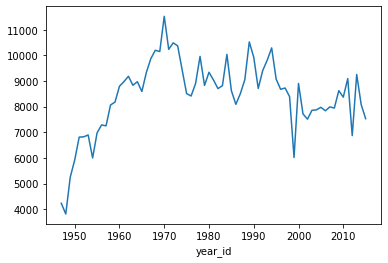

In [113]:
%matplotlib inline
nba[nba["fran_id"] == "Knicks"].groupby("year_id")["pts"].sum().plot()
#nba["fran_id"].value_counts().head(10).plot(kind="bar")

<AxesSubplot:>

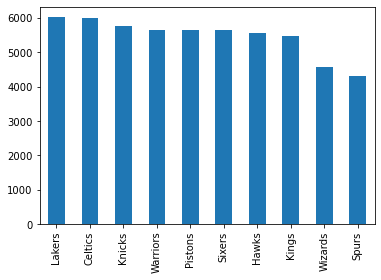

In [114]:
#Q11 A). The above graph shows a dramatic incline in initial years of the Knicks till 1970, where a decline is observed 
#  after 1970 and pts remained monotonous till a sharp decline was observed in 1999 before recovery and remained constitent
#  till 2015 around 8000 with minor up and down.

nba["fran_id"].value_counts().head(10).plot(kind="bar")

<AxesSubplot:ylabel='pts'>

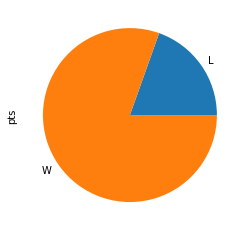

In [125]:
#Q11 B). Above chart shows that Lakers played the most number of games around 6000 followed by Celtics while the 
#lowest number of games were played by Spurs followed by Wizards above 4000.

nba[(nba["fran_id"] == "Heat") & (nba["year_id"] == 2013)].groupby("game_result")["pts"].sum().plot(kind="pie")